# Time Series Analysis of the monthly exchange rates


Version of the Notebook with Python 3.13.0

This notebook examines US to NZ dollar exchage rates for the period from 1975 to 2025. 

The table is available on the following website: https://fred.stlouisfed.org/series/EXUSNZ

### 1. Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, timezone
import calendar

import matplotlib.pyplot as plt
import statsmodels as sm

#setting plot size
plt.rcParams['figure.figsize'] = [14,8]

### 2. Reading input file


In [2]:
%%time
file = '../Data/EXUSNZ.csv'

rate=pd.read_csv(file, skiprows=1, header=None,
                  names=['Date','EXUSNZ'],
                  parse_dates=['Date'],
                  index_col='Date')
rate.head(5)

CPU times: total: 15.6 ms
Wall time: 6.16 ms


,EXUSNZ
Date,
1971-01-01,1.1194
1971-02-01,1.1250
1971-03-01,1.1254
1971-04-01,1.1250
1971-05-01,1.1254


In [3]:
#Table Infos
rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658 entries, 1971-01-01 to 2025-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EXUSNZ  658 non-null    float64
dtypes: float64(1)
memory usage: 10.3 KB


<Axes: xlabel='Date'>

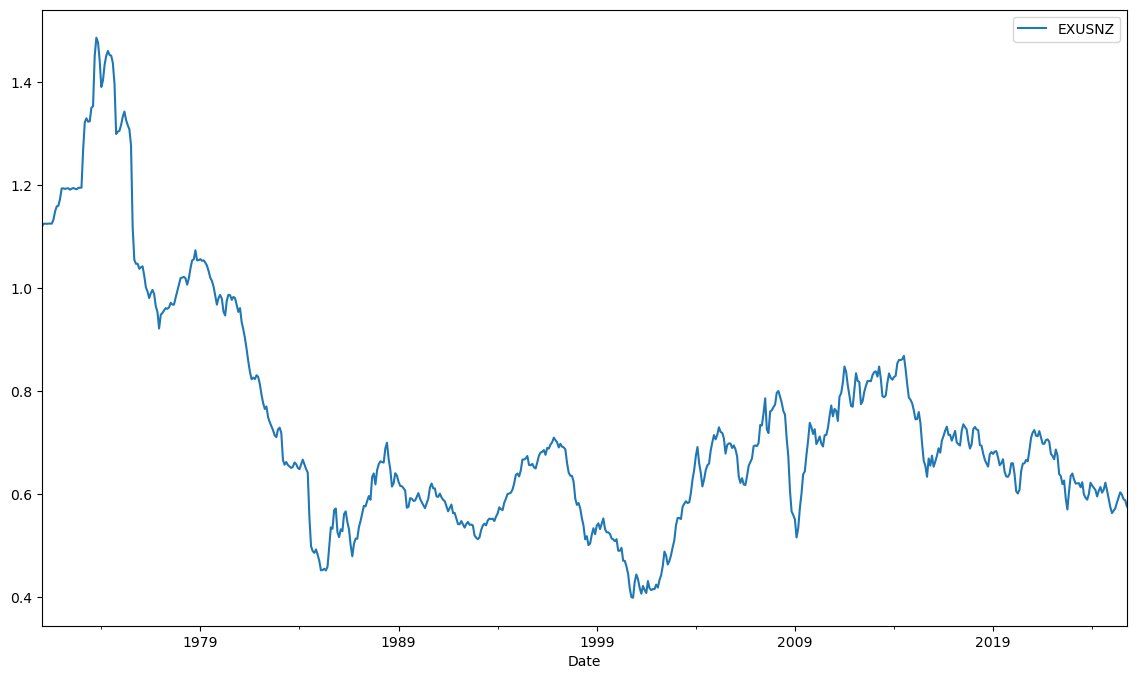

In [4]:
rate.plot()

### 3. Calculating autocorrelation

In [5]:
monthly_diff = rate.diff()
monthly_diff.head(5)

,EXUSNZ
Date,
1971-01-01,NaN
1971-02-01,0.0056
1971-03-01,0.0004
1971-04-01,-0.0004
1971-05-01,0.0004


In [6]:
autocorrelation_monthly = monthly_diff['EXUSNZ'].autocorr()
print(autocorrelation_monthly)

0.3503807749350424


0.09337775762139071


<Axes: xlabel='Date'>

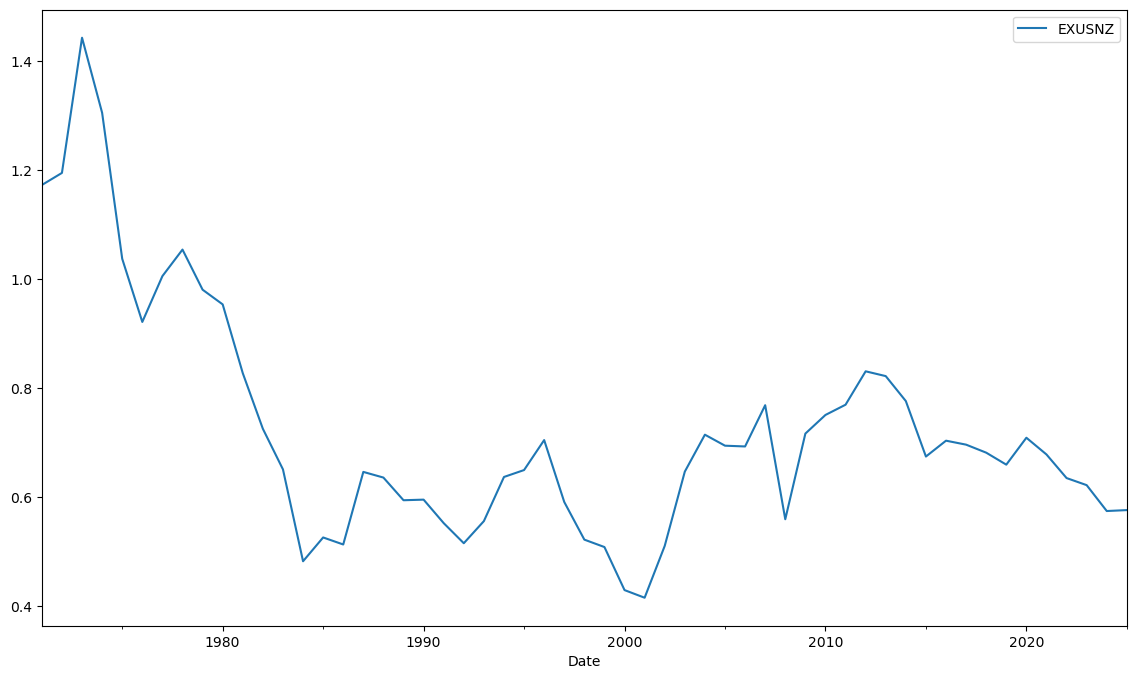

In [7]:
#downsample from monthly to annually

yearly_rate = rate.resample(rule='YE').last()

yearly_diff = yearly_rate.diff()
autocorrelation_yearly = yearly_diff['EXUSNZ'].autocorr()
print(autocorrelation_yearly)
yearly_rate.plot()

### 4. Percentage of change

<Axes: xlabel='Date'>

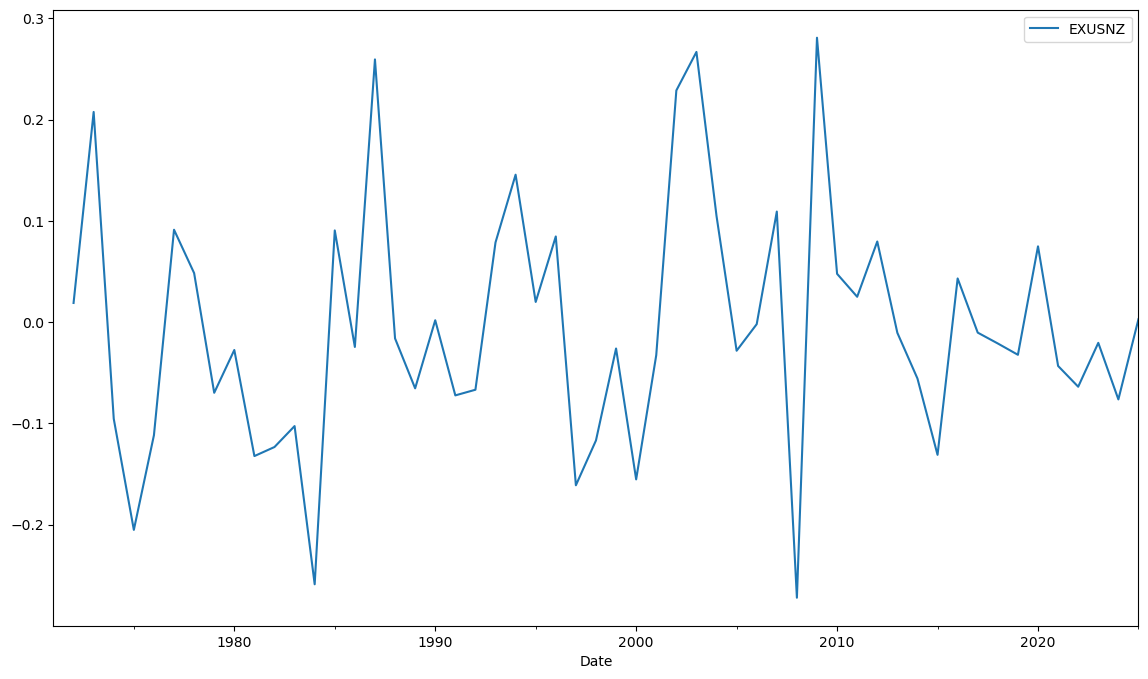

In [8]:
yearly_change = yearly_rate.pct_change()
yearly_change.plot()

In [9]:
import math
#confidence interval
yearly_len = len(yearly_change)
conf = 1.96/math.sqrt(yearly_len)
print("The approximate confidence interval is +/- %4.2f" %(conf) )

The approximate confidence interval is +/- 0.26


In [10]:
# main statistics parameters
mean = yearly_change.mean(axis=0)
std = yearly_change.std(axis=0)
print("The standard deviation is %5.2f" % (std.iloc[0]))

The standard deviation is  0.12
